SOCIO ECONOMIC HEALTH DISPARITY

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [24]:
file = "SES_RAW DATA/morbidity/NHANES_SES_RawData.csv"
df = pd.read_csv(file)
df.head()

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,OCD150,HOD051,DIQ010,MCQ010,MCQ160B,...,MCQ160M,MCQ160P,MCQ160L,MCQ550,MCQ220,HSQ590,LBXHA,HEQ010,KIQ022,RXQ033
0,130378.0,43.0,1.0,5.0,5.00,1.0,10.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,1.0,9.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,1.0,6.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130386.0,34.0,1.0,4.0,1.33,1.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
4,130387.0,68.0,2.0,5.0,1.32,4.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0


In [25]:
df.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'OCD150',
       'HOD051', 'DIQ010', 'MCQ010', 'MCQ160B', 'MCQ160C', 'MCQ160E',
       'MCQ160M', 'MCQ160P', 'MCQ160L', 'MCQ550', 'MCQ220', 'HSQ590', 'LBXHA',
       'HEQ010', 'KIQ022', 'RXQ033'],
      dtype='object')

In [26]:
# rename columns
df.columns = ['SEQN',
    'Age', 'Gender', 'Education', 'FamilyIncomeRatio', # Demographics
    'Occupation', # Occupational
    'Housing', # Housing
    'Diabetes', # Diabetes
    'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack', 
    'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', # Disease
    'HIV', # HIV
    'HepatitisA', # Hepatitis A
    'HepatitisB', # Hepatitis B
    'WeakFailingKidney', # Kidney
    'TakenPrescriptionMedicine' # Prescription
]



df.head()

,SEQN,Age,Gender,Education,FamilyIncomeRatio,Occupation,Housing,Diabetes,Asthma,CongestiveHeartFailure,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
0,130378.0,43.0,1.0,5.0,5.00,1.0,10.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,1.0,9.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,1.0,6.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130386.0,34.0,1.0,4.0,1.33,1.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
4,130387.0,68.0,2.0,5.0,1.32,4.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0


In [27]:
df.drop(columns=['SEQN'], inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6064 non-null   float64
 1   Gender                     6064 non-null   float64
 2   Education                  6064 non-null   float64
 3   FamilyIncomeRatio          6064 non-null   float64
 4   Occupation                 6064 non-null   float64
 5   Housing                    6064 non-null   float64
 6   Diabetes                   6064 non-null   float64
 7   Asthma                     6064 non-null   float64
 8   CongestiveHeartFailure     6064 non-null   float64
 9   CoronaryHeartDisease       6064 non-null   float64
 10  HeartAttack                6064 non-null   float64
 11  ThyroidProblem             6064 non-null   float64
 12  Emphysema                  6064 non-null   float64
 13  LiverCondition             6064 non-null   float

In [29]:
df.describe()

,Age,Gender,Education,FamilyIncomeRatio,Occupation,Housing,Diabetes,Asthma,CongestiveHeartFailure,CoronaryHeartDisease,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
count,6064.000000,6064.000000,6064.000000,6.064000e+03,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,...,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000
mean,53.850099,1.551451,3.839380,2.906971e+00,2.370218,5.695086,1.893305,1.824703,1.967843,1.974604,...,1.875495,1.937500,1.952342,1.905508,1.856530,1.743734,1.618734,2.017645,1.974604,1.307058
std,17.183330,0.497387,1.144338,1.543564e+00,1.448999,4.572527,0.410156,0.457434,0.338017,0.496414,...,0.464295,0.388545,0.365335,0.453487,0.417176,0.510125,0.497149,0.486179,0.355464,0.523292
min,20.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.000000,1.000000,3.000000,1.620000e+00,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000
50%,57.000000,2.000000,4.000000,2.820000e+00,1.000000,5.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,68.000000,2.000000,5.000000,4.560000e+00,4.000000,7.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,9.000000,5.000000e+00,9.000000,99.000000,3.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000,9.000000,9.000000,9.000000


In [30]:
#Creating a new column called SES_Score which is the sum of the SES columns

df["SES_Score"] = df[["Age", "Gender", "Education", "FamilyIncomeRatio", "Occupation", "Housing"]].sum(axis=1)

df.drop(columns=["Age", "Gender", "Education", "FamilyIncomeRatio", "Occupation", "Housing"], inplace=True)

In [31]:
#Creating a new column called HealthIndicator which is the sum of the disease columns

# Sum all disease-related columns to create a health score
df['HealthIndicator'] = df[['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
                            'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
                            'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
                            'TakenPrescriptionMedicine']].sum(axis=1)

# Drop individual disease columns to avoid redundancy
df = df.drop(columns=['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
                      'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
                      'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
                      'TakenPrescriptionMedicine'])


In [32]:
df.head()

,SES_Score,HealthIndicator
0,65.00,28.0
1,87.00,27.0
2,57.41,25.0
3,44.33,29.0
4,87.32,28.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SES_Score        6064 non-null   float64
 1   HealthIndicator  6064 non-null   float64
dtypes: float64(2)
memory usage: 94.9 KB


In [34]:
# features = df.columns.drop('SEQN')

# scaler = StandardScaler()
# df_scaled = df.copy()
# df_scaled[features] = scaler.fit_transform(df[features])

In [35]:
# df_scaled.describe()

In [36]:
# df_scaled.head()

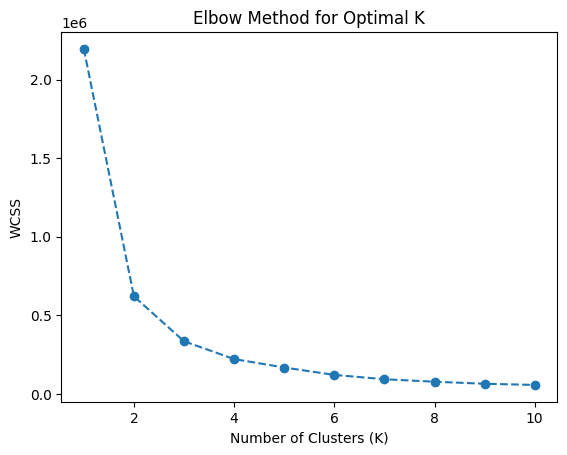

In [37]:
# try elbow method
 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)  # Use the original data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [45]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

In [ ]:
# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(df.drop(columns=['cluster']))
# df['PCA1'] = pca_result[:, 0]
# df['PCA2'] = pca_result[:, 1]
# df['PCA3'] = pca_result[:, 2]

In [46]:
df.head()

,SES_Score,HealthIndicator,cluster
0,65.00,28.0,0
1,87.00,27.0,1
2,57.41,25.0,0
3,44.33,29.0,0
4,87.32,28.0,1


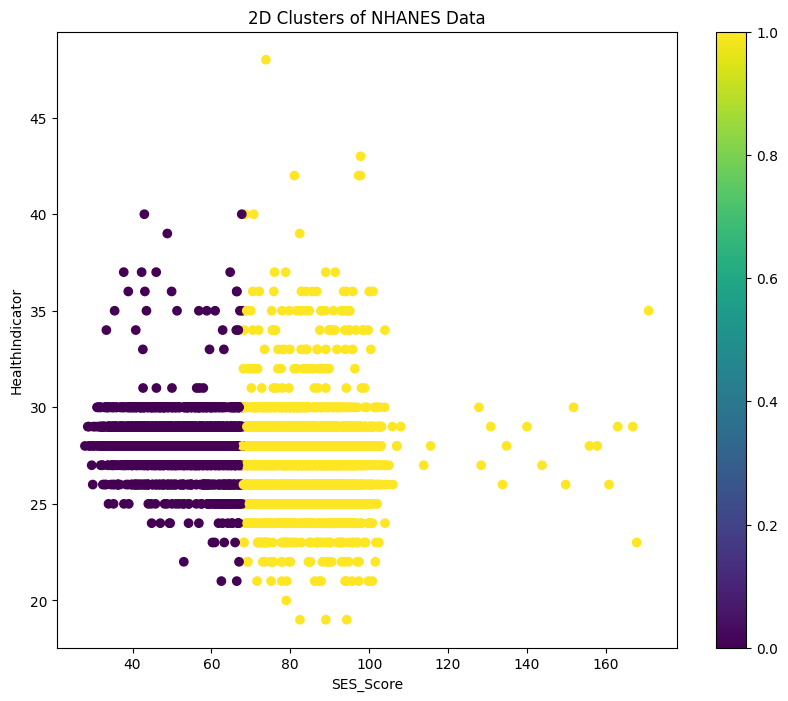

In [50]:
# # Visualize Clusters in 3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(df['SES_Score'], df['HealthIndicator'], c=df['cluster'], cmap='viridis')
# ax.set_xlabel("PCA1")
# ax.set_ylabel("PCA2")
# ax.set_zlabel("PCA3")
# plt.title("3D Clusters of NHANES Data")
# plt.colorbar(sc)
# plt.show()

# Visualize Clusters in 2D
plt.figure(figsize=(10, 8))
plt.scatter(df['SES_Score'], df['HealthIndicator'], c=df['cluster'], cmap='viridis')
plt.xlabel("SES_Score")
plt.ylabel("HealthIndicator")
plt.title("2D Clusters of NHANES Data")
plt.colorbar()
plt.show()

In [49]:
# get the silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df, df['cluster'])


np.float64(0.6141861513577059)

### Plot cluster to each diseases

In [51]:
# # plot each disease against the cluster

# # Create a new DataFrame for plotting
# df_plot = df[['cluster']].copy()

# # Add disease columns to the plotting DataFrame
# disease_columns = [
#     'Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
#     'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
#     'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
#     'TakenPrescriptionMedicine'
# ]

# df_plot[disease_columns] = df[disease_columns]

# # Plot each disease against the cluster
# for disease in disease_columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='cluster', y=disease, data=df_plot)
#     plt.title(f'Cluster vs {disease}')
#     plt.show()


##examining clusters 


In [53]:
df.to_csv('exported_data.csv', index=False)

In [52]:
df.head()

,SES_Score,HealthIndicator,cluster
0,65.00,28.0,0
1,87.00,27.0,1
2,57.41,25.0,0
3,44.33,29.0,0
4,87.32,28.0,1
